In [1]:
import pandas as pd
import numpy as np
seginfofile="/Users/irffanalahi/Research/Research_update/SM/melcfdref/LargerLTME/BluOurPBL/Dashboard/BlOurPBLourCD8TIL_out_mincpg2_q0.5_addedcol_q0.00001_diff0.1_hypo_noheader_genomic_feature_withrepeat_header_celltypeseperated/PELT/QC/try2/downstream/BlOurPBLourCD8TIL_out_mincpg2_cutoff_hypo_ready_PELT_minsegesize_3_penaltyvalue_3.5_percoreMetDMR_1000_segmentinfo/BluOurPBLOurCD8til_wg_all_matrixCin_nr0.5_imputed_g1_CD8TIL_3_g2_others_36.txt_q0.00001_diff0.1_hypo.txt"

seginfodf=pd.read_csv(seginfofile,sep="\t")

seginfodf.head()

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mDC,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin
0,chr1,973577,973714,51.304594,51.304594,1.0,chr1,973577,973714,0.0,...,-0.593833,-0.552111,-0.322917,-0.335889,-0.322917,-0.596556,-0.322917,-0.596556,0.0,0.0
1,chr1,1142240,1142697,114.925020,114.925020,1.0,chr1,1142240,1142697,0.0,...,-0.577833,-0.620812,-0.108167,0.119688,0.119688,-0.620812,0.119688,-0.620812,0.0,0.0
2,chr1,1165937,1166209,224.484542,224.484542,1.0,chr1,1165937,1166209,0.0,...,-0.702449,-0.701641,-0.491321,-0.079974,0.151705,-0.737923,0.151705,-0.737923,0.0,0.0
3,chr1,1171777,1172481,81.254130,81.254130,1.0,chr1,1171777,1172481,0.0,...,-0.705754,-0.693319,0.089080,-0.109043,0.089080,-0.705754,0.089080,-0.705754,0.0,0.0
4,chr1,1287951,1288149,246.851153,246.851153,1.0,chr1,1287951,1288149,0.0,...,-0.386970,-0.429061,-0.416606,-0.112576,-0.112576,-0.474076,-0.112576,-0.474076,0.0,0.0


In [2]:
######find out how many parent has all bad dmrs

uniquparendmr=seginfodf.groupby(['parentDMRchrom','parentDMRstart','parentDMRend'])

allbadtotalseg2=[]
allbadtotalseg3=[]
allbadtotalseg4=[]
onegoodothersbad=[]

totaluniquebaddmrs=[]
for name, group in uniquparendmr:
    if group.shape[0]>1:
        if group['correlation_distance'].min()<0.1:
            totaluniquebaddmrs.append(name)
    if group['correlation_distance'].max()<0.1:
        if group.shape[0]==2:
            allbadtotalseg2.append(name)
            allbad2=group
        elif group.shape[0]==3:
            allbadtotalseg3.append(name)
            allbad3=group
            
        elif group.shape[0]==4:
            allbadtotalseg4.append(name)
            allbad4=group
    elif group['correlation_distance'].max()>=0.1 and group['correlation_distance'].min()<0.1  and group.shape[0]>1:
        
        onegoodothersbad.append(name)
        
        if group['correlation_distance'].max()>=0.3 and group['correlation_distance'].min()<0.1  and group.shape[0]>1:
            toshowonegood=group
print(len(allbadtotalseg2)) 
print(len(allbadtotalseg3))
print(len(allbadtotalseg4))
print(len(onegoodothersbad))

print(len(totaluniquebaddmrs))

'''
print(len(set(allbadtotalseg2))) 
print(len(set(allbadtotalseg3)))
print(len(set(onegoodothersbad)))

print(len(set(totaluniquebaddmrs)))

whatismissing=set(totaluniquebaddmrs)-set(allbadtotalseg2)-set(allbadtotalseg3)-set(onegoodothersbad)

whatismissing
'''

144
15
1
105
265


'\nprint(len(set(allbadtotalseg2))) \nprint(len(set(allbadtotalseg3)))\nprint(len(set(onegoodothersbad)))\n\nprint(len(set(totaluniquebaddmrs)))\n\nwhatismissing=set(totaluniquebaddmrs)-set(allbadtotalseg2)-set(allbadtotalseg3)-set(onegoodothersbad)\n\nwhatismissing\n'

In [3]:
toshowonegood

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mDC,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin
3310,chr9,136901071,136901370,1806.966185,76.306173,23.680472,chr9,136901071,136902540,0.063129,...,-0.603233,-0.067033,-0.168833,-0.277500,-0.048111,-0.622067,-0.067033,-0.615367,-0.018922,0.006700
3311,chr9,136901371,136901741,46.822506,76.306173,0.613614,chr9,136901071,136902540,0.124322,...,-0.293583,-0.320167,-0.083417,0.413583,-0.048111,-0.622067,0.413583,-0.345250,0.461694,0.276817
3312,chr9,136901742,136902540,117.974669,76.306173,1.546070,chr9,136901071,136902540,0.018227,...,-0.650938,-0.743750,-0.017865,-0.020167,-0.048111,-0.622067,-0.017865,-0.743750,0.030247,-0.121683


In [4]:
onegoodothersbad

[('chr1', 9715523, 9717162),
 ('chr1', 40387569, 40388459),
 ('chr1', 41699005, 41699826),
 ('chr1', 87883663, 87885040),
 ('chr1', 116807997, 116809395),
 ('chr1', 198679091, 198680415),
 ('chr1', 235074977, 235076039),
 ('chr10', 7192618, 7193809),
 ('chr10', 62048708, 62049490),
 ('chr10', 84357313, 84357746),
 ('chr10', 86139525, 86141069),
 ('chr10', 126013982, 126014667),
 ('chr11', 785915, 786387),
 ('chr11', 64868782, 64870266),
 ('chr11', 64873745, 64874874),
 ('chr11', 64900424, 64900589),
 ('chr12', 6954429, 6957216),
 ('chr12', 22408703, 22411663),
 ('chr12', 31964959, 31966900),
 ('chr12', 47365096, 47368025),
 ('chr13', 112768641, 112769432),
 ('chr14', 91354279, 91355565),
 ('chr15', 28919050, 28919848),
 ('chr15', 69629495, 69630541),
 ('chr15', 90889433, 90890078),
 ('chr16', 327034, 327749),
 ('chr16', 721652, 722360),
 ('chr16', 1525749, 1526750),
 ('chr16', 3065052, 3067520),
 ('chr16', 11237657, 11238267),
 ('chr16', 29686189, 29686695),
 ('chr16', 89324095, 893246

In [5]:
allbad2


,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mDC,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin
3446,chrX,154350972,154351921,67.358555,54.545439,1.234907,chrX,154350972,154352290,0.001679,...,-0.618118,-0.647206,-0.087436,-0.698108,0.052581,-0.652667,0.072931,-0.698108,0.02035,-0.045441
3447,chrX,154351922,154352290,332.650100,54.545439,6.098587,chrX,154350972,154352290,0.020799,...,-0.519879,-0.512576,-0.380576,-0.512212,0.052581,-0.652667,-0.010318,-0.549903,-0.06290,0.102764


In [6]:
allbad3


,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mDC,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin
3261,chr9,133701181,133701585,195.544829,45.527911,4.295054,chr9,133701181,133702273,0.004571,...,-0.673489,-0.579689,-0.250022,0.000533,-0.022383,-0.679451,0.000533,-0.756738,0.022916,-0.077287
3262,chr9,133701586,133701870,134.247482,45.527911,2.948685,chr9,133701181,133702273,0.006815,...,-0.472405,-0.416952,-0.256786,-0.054524,-0.022383,-0.679451,-0.031113,-0.597948,-0.008730,0.081503
3263,chr9,133701871,133702273,92.228002,45.527911,2.025746,chr9,133701181,133702273,0.008410,...,-0.651000,-0.589500,-0.119722,-0.016481,-0.022383,-0.679451,-0.008026,-0.678437,0.014357,0.001014


In [7]:
allbad4

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mDC,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin
2991,chr16,84547481,84548272,115.450375,74.870482,1.542001,chr16,84547481,84549493,0.008509,...,-0.650684,-0.637544,-0.550912,-0.445772,-0.270484,-0.68807,-0.433232,-0.687526,-0.162748,0.000544
2992,chr16,84548273,84548502,120.078144,74.870482,1.603812,chr16,84547481,84549493,0.005654,...,-0.415429,-0.370952,-0.381738,-0.301524,-0.270484,-0.68807,-0.226783,-0.415429,0.043701,0.272642
2993,chr16,84548503,84549356,299.690060,74.870482,4.002780,chr16,84547481,84549493,0.005604,...,-0.819190,-0.833714,-0.777512,-0.380381,-0.270484,-0.68807,-0.177661,-0.846614,0.092824,-0.158544
2994,chr16,84549357,84549493,61.759631,74.870482,0.824886,chr16,84547481,84549493,0.060472,...,-0.470933,-0.541867,-0.610800,-0.140867,-0.270484,-0.68807,0.046560,-0.667933,0.317044,0.020137


In [8]:
seginfodfbestcorr=seginfodf.sort_values('correlation_distance', ascending=False).drop_duplicates(['parentDMRchrom','parentDMRstart','parentDMRend'])
seginfodfbestcorr=seginfodfbestcorr[seginfodfbestcorr['correlation_distance']>0]
seginfodfbestcorr['logcorr']=np.log10(seginfodfbestcorr['correlation_distance'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdad220c3c8>,
      dtype=object)

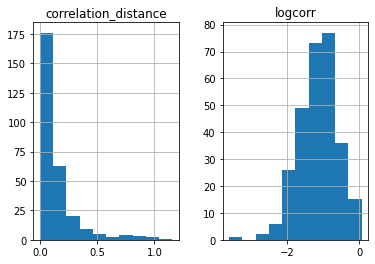

In [9]:
seginfodfbestcorr.hist(column=['correlation_distance','logcorr'])

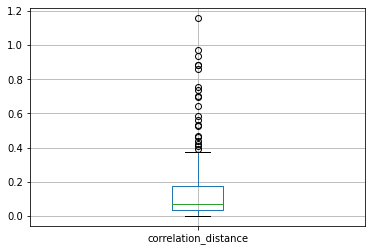

In [10]:
seginfodfbestcorr.boxplot(column=['correlation_distance'])

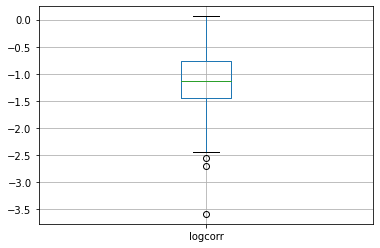

In [11]:
seginfodfbestcorr.boxplot(column=['logcorr'])

In [12]:
totalseg=seginfodfbestcorr.shape[0]
totalseg

285

In [13]:
totalgoodseg=(seginfodfbestcorr[seginfodfbestcorr['correlation_distance']>=.1]).shape[0]
totalgoodseg

125

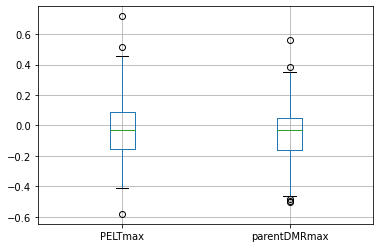

In [14]:
goodsegdf=seginfodfbestcorr[seginfodfbestcorr['correlation_distance']>=.1]
goodsegdf.boxplot(column=['PELTmax','parentDMRmax'])

In [15]:
badsegdf=seginfodfbestcorr[seginfodfbestcorr['correlation_distance']<.1]
badsegdf.head()

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin,logcorr
1165,chr11,1870923,1871006,75.550600,48.485398,1.558213,chr11,1870923,1871466,0.055156,...,-0.419810,-0.440429,0.393524,0.122812,-0.662077,0.393524,-0.441048,0.270712,0.221029,-1.000875
221,chr1,40388993,40389391,428.792353,93.789695,4.571849,chr1,40388726,40389391,0.006402,...,-0.737306,-0.719139,-0.845583,-0.265218,-0.834014,-0.343781,-0.845583,-0.078563,-0.011569,-1.021561
4020,chr19,1077462,1077814,188.124079,72.354471,2.600034,chr19,1077462,1078237,0.027959,...,-0.676800,-0.107667,-0.642578,0.100093,-0.705333,0.093342,-0.676800,-0.006751,0.028533,-1.023006
2828,chr16,29744657,29744824,626.579288,60.987089,10.273966,chr16,29743964,29744824,0.047760,...,-0.227667,-0.685848,-0.459879,-0.056850,-0.646167,0.058806,-0.685848,0.115656,-0.039682,-1.043700
6176,chr4,2746633,2746786,242.412487,111.777294,2.168710,chr4,2746069,2746786,0.014040,...,-0.811048,0.114333,-0.775333,0.060102,-0.710352,0.114333,-0.811048,0.054231,-0.100696,-1.061485


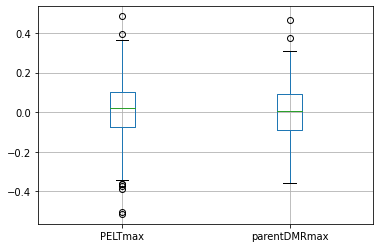

In [16]:

badsegdf.boxplot(column=['PELTmax','parentDMRmax'])

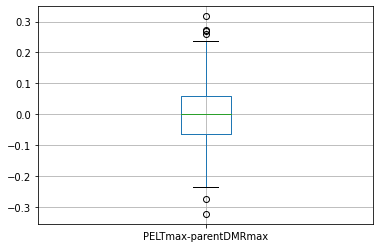

In [17]:
badsegdf.boxplot(column=['PELTmax-parentDMRmax'])

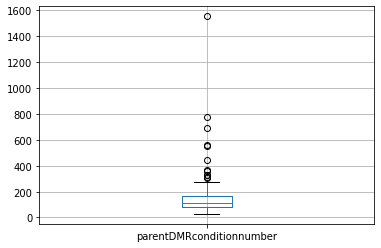

In [18]:
badsegdf.boxplot(column=['parentDMRconditionnumber'])

In [19]:
badsegdf[badsegdf['parentDMRconditionnumber']>400]

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin,logcorr
1864,chr12,120014562,120014792,517.738119,562.283328,0.920778,chr12,120014340,120014792,0.028070,...,-0.350889,-0.315028,0.210722,0.003872,-0.558410,0.210722,-0.384444,0.206850,0.173966,-1.148154
6337,chr4,98529397,98529725,54.290418,693.542708,0.078280,chr4,98529091,98529725,0.069048,...,-0.176222,-0.191000,0.304000,0.156848,-0.425045,0.304000,-0.211750,0.147152,0.213295,-1.825712
735,chr10,28335000,28335289,66.301821,775.078318,0.085542,chr10,28335000,28335331,0.005568,...,-0.555611,-0.019167,-0.149222,-0.007000,-0.843000,-0.019167,-0.811778,-0.012167,0.031222,-1.859106
2019,chr13,50128719,50128779,114.161487,550.513532,0.207373,chr13,50128532,50128779,0.002692,...,-0.817250,0.012583,-0.847833,0.014949,-0.572513,0.012583,-0.851683,-0.002365,-0.279171,-1.915552
4145,chr19,16327040,16327148,915.242736,444.939961,2.057003,chr19,16326744,16327148,0.008081,...,-0.731095,0.031571,-0.841238,0.083287,-0.781442,0.038143,-0.841238,-0.045144,-0.059796,-2.073855
5023,chr2,241762697,241762783,194.341373,1553.347994,0.125111,chr2,241762442,241762783,0.000750,...,-0.880667,-0.828333,-0.822267,0.110848,-0.761727,0.057867,-0.896933,-0.052982,-0.135206,-3.593308


In [20]:
badsegdf[badsegdf['parentDMRmax']<-.1]

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin,logcorr
221,chr1,40388993,40389391,428.792353,93.789695,4.571849,chr1,40388726,40389391,0.006402,...,-0.737306,-0.719139,-0.845583,-0.265218,-0.834014,-0.343781,-0.845583,-0.078563,-0.011569,-1.021561
1905,chr12,124739260,124739359,112.559007,202.390540,0.556148,chr12,124738911,124739359,0.005228,...,-0.441600,-0.343533,-0.080800,-0.210702,-0.738524,-0.080800,-0.448733,0.129902,0.289790,-1.128688
3319,chr9,137096359,137096547,673.665906,309.149037,2.179098,chr9,137096166,137096547,0.012100,...,-0.503000,-0.452150,-0.461967,-0.200714,-0.580810,-0.270440,-0.507000,-0.069726,0.073810,-1.134630
2994,chr16,84549357,84549493,61.759631,74.870482,0.824886,chr16,84547481,84549493,0.060472,...,-0.541867,-0.610800,-0.140867,-0.270484,-0.688070,0.046560,-0.667933,0.317044,0.020137,-1.182388
3369,chrX,19799009,19799652,66.745271,89.927733,0.742210,chrX,19797375,19799652,0.030548,...,-0.766611,-0.692500,-0.633667,-0.143104,-0.749789,0.019833,-0.766611,0.162937,-0.016822,-1.186419
6162,chr4,878967,879605,513.399269,177.261502,2.896282,chr4,878967,880038,0.009026,...,-0.838286,-0.759738,-0.800595,-0.131119,-0.875716,-0.176479,-0.866857,-0.045359,0.008859,-1.188929
4466,chr2,38749269,38749339,62.322599,84.228219,0.739925,chr2,38748058,38749339,0.005272,...,-0.758833,-0.185750,-0.703333,-0.187520,-0.550356,-0.185750,-0.875667,0.001770,-0.325310,-1.197635
1825,chr12,100202640,100202806,4871.919188,184.472844,26.409953,chr12,100202640,100203242,0.005625,...,-0.499567,-0.468700,-0.416800,-0.206230,-0.635481,-0.140740,-0.513867,0.065490,0.121615,-1.221436
1822,chr12,98521140,98521402,159.352175,125.126901,1.273525,chr12,98520526,98521402,0.004500,...,-0.754625,-0.415646,-0.598917,-0.203881,-0.624841,-0.325208,-0.771292,-0.121327,-0.146450,-1.235738
8564,chr9,90966491,90966632,291.578741,220.066621,1.324957,chr9,90966491,90966973,0.007241,...,-0.815810,-0.566238,-0.159048,-0.183778,-0.833917,-0.159048,-0.824800,0.024730,0.009117,-1.235870


In [21]:
badsegdf[badsegdf['PELTmax']>-.3]

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin,logcorr
1165,chr11,1870923,1871006,75.550600,48.485398,1.558213,chr11,1870923,1871466,0.055156,...,-0.419810,-0.440429,0.393524,0.122812,-0.662077,0.393524,-0.441048,0.270712,0.221029,-1.000875
4020,chr19,1077462,1077814,188.124079,72.354471,2.600034,chr19,1077462,1078237,0.027959,...,-0.676800,-0.107667,-0.642578,0.100093,-0.705333,0.093342,-0.676800,-0.006751,0.028533,-1.023006
2828,chr16,29744657,29744824,626.579288,60.987089,10.273966,chr16,29743964,29744824,0.047760,...,-0.227667,-0.685848,-0.459879,-0.056850,-0.646167,0.058806,-0.685848,0.115656,-0.039682,-1.043700
6176,chr4,2746633,2746786,242.412487,111.777294,2.168710,chr4,2746069,2746786,0.014040,...,-0.811048,0.114333,-0.775333,0.060102,-0.710352,0.114333,-0.811048,0.054231,-0.100696,-1.061485
2865,chr16,53373646,53373730,136.852881,65.122021,2.101484,chr16,53373646,53373897,0.021644,...,-0.193200,-0.428600,-0.075833,-0.049467,-0.454233,-0.075833,-0.428600,-0.026367,0.025633,-1.065734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,chr2,202269112,202269720,321.366829,84.678407,3.795145,chr2,202268300,202269720,0.003587,...,-0.493778,0.181194,-0.546917,0.222417,-0.514300,0.181194,-0.587194,-0.041222,-0.072894,-2.317150
7797,chr7,98931461,98931641,1152.181829,302.143121,3.813364,chr7,98931112,98931641,0.000223,...,-0.433333,-0.180000,-0.382467,-0.218167,-0.571333,-0.180000,-0.442800,0.038167,0.128533,-2.445624
1803,chr12,92405681,92405868,349.954196,111.321591,3.143633,chr12,92405681,92406268,0.002551,...,-0.325767,-0.474467,-0.573667,0.103500,-0.666937,0.100633,-0.573667,-0.002867,0.093270,-2.565960
6971,chr6,3802422,3802555,48.464910,239.515463,0.202346,chr6,3802063,3802555,0.021593,...,-0.426333,0.362767,-0.419667,0.188792,-0.587889,0.362767,-0.443867,0.173975,0.144022,-2.707515


In [22]:
badsegdf[badsegdf['PELTmax']>=badsegdf['parentDMRmax']]

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin,logcorr
1165,chr11,1870923,1871006,75.550600,48.485398,1.558213,chr11,1870923,1871466,0.055156,...,-0.419810,-0.440429,0.393524,0.122812,-0.662077,0.393524,-0.441048,0.270712,0.221029,-1.000875
2828,chr16,29744657,29744824,626.579288,60.987089,10.273966,chr16,29743964,29744824,0.047760,...,-0.227667,-0.685848,-0.459879,-0.056850,-0.646167,0.058806,-0.685848,0.115656,-0.039682,-1.043700
6176,chr4,2746633,2746786,242.412487,111.777294,2.168710,chr4,2746069,2746786,0.014040,...,-0.811048,0.114333,-0.775333,0.060102,-0.710352,0.114333,-0.811048,0.054231,-0.100696,-1.061485
8039,chr8,21912184,21912393,104.952916,55.079678,1.905474,chr8,21912184,21913379,0.023474,...,-0.754281,-0.094368,-0.761316,-0.028295,-0.729021,0.024754,-0.761316,0.053050,-0.032295,-1.103928
5622,chr22,37146346,37146749,199.174561,90.792752,2.193728,chr22,37146346,37149305,0.022120,...,-0.556852,-0.454426,-0.012889,0.079463,-0.782935,0.181389,-0.633333,0.101925,0.149602,-1.116246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,chr2,181393874,181393974,95.228051,192.354346,0.495066,chr2,181393874,181394243,0.042438,...,-0.312972,-0.314444,-0.256833,0.374867,-0.500000,0.484056,-0.333333,0.109189,0.166667,-2.227472
7188,chr6,73449724,73450484,104.891610,57.408572,1.827107,chr6,73449724,73450977,0.005737,...,-0.483157,0.240402,-0.289137,0.153504,-0.574634,0.240402,-0.521725,0.086898,0.052909,-2.286559
4963,chr2,234464357,234464595,124.530430,244.864868,0.508568,chr2,234463783,234464595,0.012634,...,-0.417722,-0.411000,-0.077889,0.258801,-0.597984,0.352603,-0.452167,0.093802,0.145817,-2.287119
7797,chr7,98931461,98931641,1152.181829,302.143121,3.813364,chr7,98931112,98931641,0.000223,...,-0.433333,-0.180000,-0.382467,-0.218167,-0.571333,-0.180000,-0.442800,0.038167,0.128533,-2.445624


In [23]:
badsegdf[badsegdf['PELTmax']>=badsegdf['parentDMRmax']+.2]

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin,logcorr
1165,chr11,1870923,1871006,75.550600,48.485398,1.558213,chr11,1870923,1871466,0.055156,...,-0.419810,-0.440429,0.393524,0.122812,-0.662077,0.393524,-0.441048,0.270712,0.221029,-1.000875
1864,chr12,120014562,120014792,517.738119,562.283328,0.920778,chr12,120014340,120014792,0.028070,...,-0.350889,-0.315028,0.210722,0.003872,-0.558410,0.210722,-0.384444,0.206850,0.173966,-1.148154
5651,chr22,39150983,39151590,74.667421,29.802285,2.505426,chr22,39149747,39151590,0.084816,...,-0.139762,-0.130690,0.351810,0.093298,-0.157702,0.351810,-0.208524,0.258512,-0.050821,-1.161466
2994,chr16,84549357,84549493,61.759631,74.870482,0.824886,chr16,84547481,84549493,0.060472,...,-0.541867,-0.610800,-0.140867,-0.270484,-0.688070,0.046560,-0.667933,0.317044,0.020137,-1.182388
7224,chr6,109482328,109482421,118.228295,157.187208,0.752150,chr6,109481561,109482421,0.015975,...,-0.786667,0.023500,-0.427381,-0.248943,-0.743130,0.023500,-0.787267,0.272443,-0.044137,-1.578853
3363,chrX,18873179,18873515,659.148623,92.164674,7.151858,chrX,18873179,18874004,0.009813,...,-0.709667,-0.579152,0.096394,-0.142137,-0.725618,0.096394,-0.709667,0.238531,0.015951,-2.015272


In [24]:
badsegdf[badsegdf['PELTmax']<badsegdf['parentDMRmax']]

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin,logcorr
221,chr1,40388993,40389391,428.792353,93.789695,4.571849,chr1,40388726,40389391,0.006402,...,-0.737306,-0.719139,-0.845583,-0.265218,-0.834014,-0.343781,-0.845583,-0.078563,-0.011569,-1.021561
4020,chr19,1077462,1077814,188.124079,72.354471,2.600034,chr19,1077462,1078237,0.027959,...,-0.676800,-0.107667,-0.642578,0.100093,-0.705333,0.093342,-0.676800,-0.006751,0.028533,-1.023006
2865,chr16,53373646,53373730,136.852881,65.122021,2.101484,chr16,53373646,53373897,0.021644,...,-0.193200,-0.428600,-0.075833,-0.049467,-0.454233,-0.075833,-0.428600,-0.026367,0.025633,-1.065734
7864,chr7,139100269,139100707,102.909879,47.943408,2.146486,chr7,139100269,139101455,0.040148,...,-0.413697,-0.342409,-0.634515,0.180303,-0.393993,0.164112,-0.634515,-0.016191,-0.240522,-1.076739
5250,chr20,50837768,50837872,119.861042,192.646027,0.622183,chr20,50837597,50837872,0.014290,...,-0.675286,-0.086929,-0.060857,-0.005522,-0.765111,-0.060857,-0.675286,-0.055335,0.089825,-1.082746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,chr2,189791807,189791927,73.165160,360.210993,0.203118,chr2,189791345,189791927,0.005406,...,-0.783500,-0.532417,0.132083,0.172472,-0.545472,0.132083,-0.786333,-0.040389,-0.240861,-2.124138
5543,chr22,20242712,20242840,130.700566,137.451229,0.950887,chr22,20242712,20242977,0.024872,...,-0.185833,-0.207042,-0.194500,0.087116,-0.288275,-0.012879,-0.229042,-0.099995,0.059233,-2.130057
4865,chr2,202269112,202269720,321.366829,84.678407,3.795145,chr2,202268300,202269720,0.003587,...,-0.493778,0.181194,-0.546917,0.222417,-0.514300,0.181194,-0.587194,-0.041222,-0.072894,-2.317150
1803,chr12,92405681,92405868,349.954196,111.321591,3.143633,chr12,92405681,92406268,0.002551,...,-0.325767,-0.474467,-0.573667,0.103500,-0.666937,0.100633,-0.573667,-0.002867,0.093270,-2.565960


In [25]:
badsegdf[badsegdf['PELTmax']<badsegdf['parentDMRmax']-.2]

,chrom,start,end,conditionnumber,parentDMRconditionnumber,conditionnumber/parentDMRconditionnumber,parentDMRchrom,parentDMRstart,parentDMRend,cos_distance,...,CD8TIL-mNeu,CD8TIL-cB,CD8TIL-MEL_TUMOR,parentDMRmax,parentDMRmin,PELTmax,PELTmin,PELTmax-parentDMRmax,PELTmin-parentDMRmin,logcorr
5515,chr21,46426034,46426159,59.106439,82.457729,0.716809,chr21,46424042,46426159,0.029467,...,-0.494667,-0.468667,-0.369133,0.119754,-0.676729,-0.154400,-0.497467,-0.274154,0.179263,-1.267664
8459,chr9,37528929,37529222,1000.890198,190.216835,5.261838,chr9,37528929,37529490,0.006648,...,-0.807958,-0.363167,-0.734667,-0.135537,-0.831063,-0.363167,-0.824617,-0.227630,0.006446,-1.628315
2737,chr16,4465669,4465911,123.475837,74.085029,1.666677,chr16,4465669,4466657,0.011573,...,-0.307889,-0.271667,-0.309833,0.308793,-0.480081,0.106556,-0.326444,-0.202237,0.153637,-1.817133
2253,chr14,64446990,64447740,301.169427,148.799067,2.024001,chr14,64446610,64447740,0.021050,...,-0.374436,-0.337846,-0.355769,0.073426,-0.440648,-0.161974,-0.394282,-0.235400,0.046366,-1.848299
3077,chr16,89727242,89727507,116.603709,117.160423,0.995248,chr16,89727242,89727997,0.049097,...,-0.537238,-0.521571,-0.436286,0.060267,-0.541317,-0.261095,-0.586952,-0.321362,-0.045636,-1.894420
